# Exploring the MoNuSeg Dataset

> The dataset for this challenge was obtained by carefully annotating tissue images of several patients with tumors of different organs and who were diagnosed at multiple hospitals. This dataset was created by downloading H&E stained tissue images captured at **40x magnification** from TCGA archive. H&E staining is a routine protocol to enhance the contrast of a tissue section and is commonly used for tumor assessment (grading, staging, etc.). Given the diversity of nuclei appearances across multiple organs and patients, and the richness of staining protocols adopted at multiple hospitals, the training datatset will enable the development of robust and generalizable nuclei segmentation techniques that will work right out of the box.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
import os
import sys
from pathlib import Path
from random import choice
from bs4 import BeautifulSoup as bs
from math import inf


image_size = (12,12)
top_folder = str(Path(os.getcwd()).parent.parent)

sys.path.append(top_folder)

In [8]:

main_folder = os.path.join(top_folder,'data','raw','unzipped','MoNuSeg','MoNuSeg 2018 Training Data') # todo use something other than cwd
image_folder = os.path.join(main_folder, 'Tissue Images')
annotation_folder = os.path.join(main_folder, 'Annotations')

## Taking a look at some images

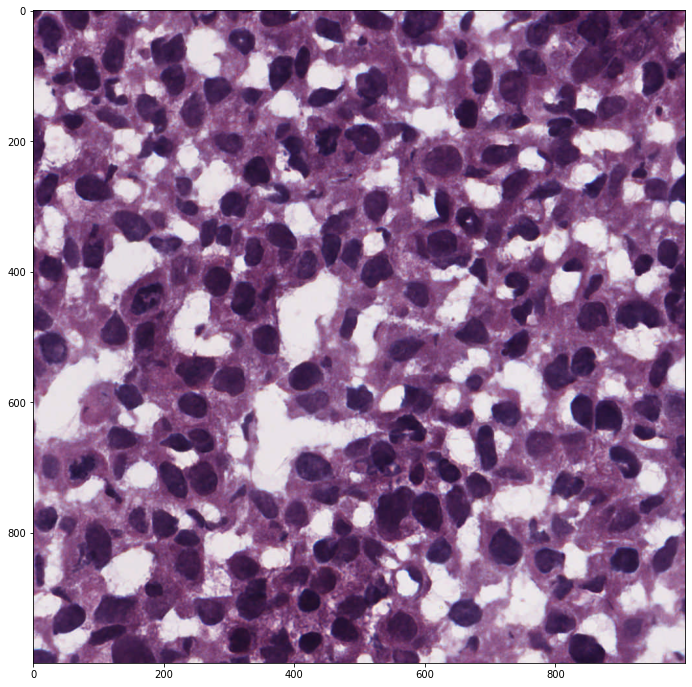

In [9]:
image_path = os.path.join(image_folder,choice(os.listdir(image_folder)))

img = Image.open(image_path,'r')
plt.figure(figsize=image_size)
plt.imshow(np.asarray(img))



## Annotations

#### How many "Annotation"s are there per annotation file:

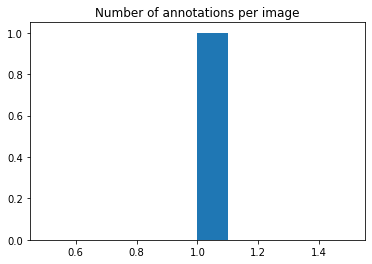

In [10]:
num_annos = []
for annotation_name in os.listdir(annotation_folder):
    path = os.path.join(annotation_folder, annotation_name)
    with open(path, 'r') as f:
        soup = bs(f.read(), 'xml')
        num_annotations = len(soup.Annotations.find_all('Annotation'))
        num_annos.append(num_annotations)
        break
    
plt.hist(num_annos)
plt.title('Number of annotations per image')
plt.show()

### Side by Side Segmentation

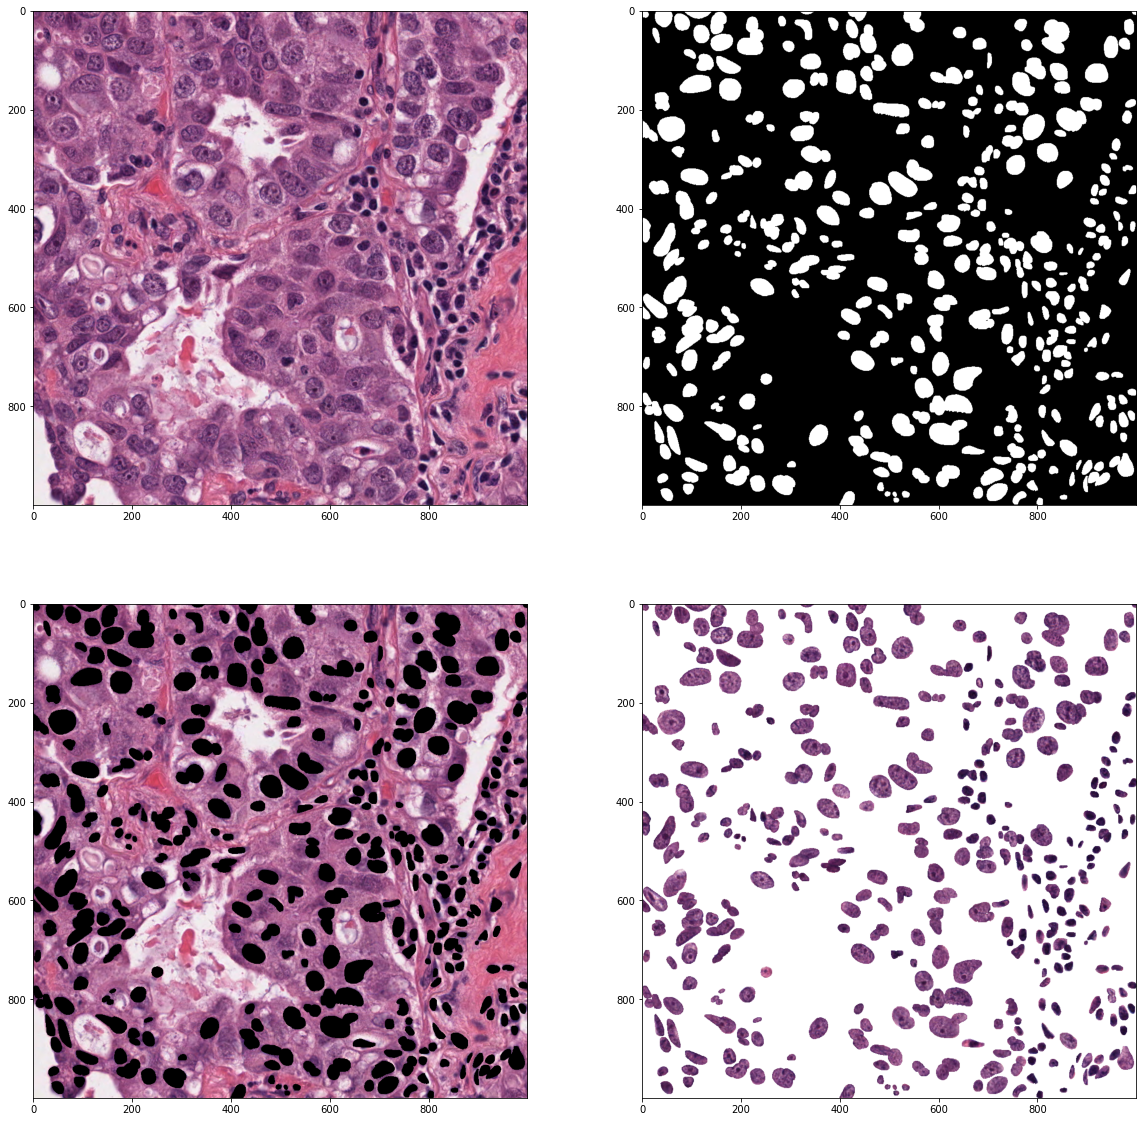

In [12]:
from src.data_processing.segmentation_mask import SegmentationMask

filename = choice(os.listdir(annotation_folder)).split('.')[0]

image_path = os.path.join(image_folder, filename + '.tif')
annotation_path = os.path.join(annotation_folder,filename +".xml")

original_image = Image.open(image_path,'r')
original_image.load()
segmented_image = SegmentationMask(annotation_path).create_mask(filled=True,size=original_image.size)


f,ax = plt.subplots(2,2,figsize=(20,20))
ax[0,0].imshow(np.asarray(original_image))
ax[0,1].imshow(np.asarray(segmented_image.convert("RGB")))
ax[1,0].imshow(np.asarray(Image.composite(ImageOps.invert(segmented_image.convert("RGB")),original_image,segmented_image)))
ax[1,1].imshow(np.asarray(Image.composite(original_image,ImageOps.invert(segmented_image.convert("RGB")),segmented_image)))
plt.show()
